# Pandas Plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting plot defatult size
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range('2016/1/1',periods=1000))

In [4]:
ts = ts.cumsum()  # row 값 누적하여 합산

In [5]:
ts.head()

2016-01-01    1.480652
2016-01-02    3.595989
2016-01-03    2.737035
2016-01-04    4.613803
2016-01-05    4.770735
Freq: D, dtype: float64

In [6]:
ts.tail()

2018-09-22   -4.242067
2018-09-23   -4.932679
2018-09-24   -5.097530
2018-09-25   -3.769234
2018-09-26   -4.715096
Freq: D, dtype: float64

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

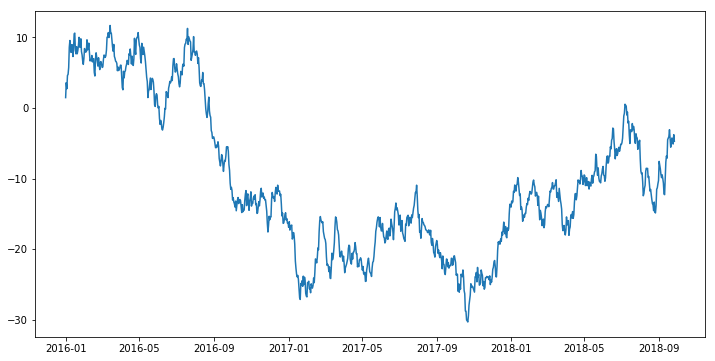

In [8]:
plt.plot(ts)

### 컬럼이 여러 개인 경우

In [9]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

In [10]:
df.head()

,A,B,C,D
2016-01-01,0.082150,1.113084,-0.188393,0.172138
2016-01-02,2.387398,-1.784724,0.217231,1.742961
2016-01-03,0.779709,-3.577393,-0.517556,0.323845
2016-01-04,0.181515,-3.845792,0.585617,-0.213433
2016-01-05,0.199922,-4.045069,-1.051866,-0.246813


<Figure size 864x432 with 0 Axes>

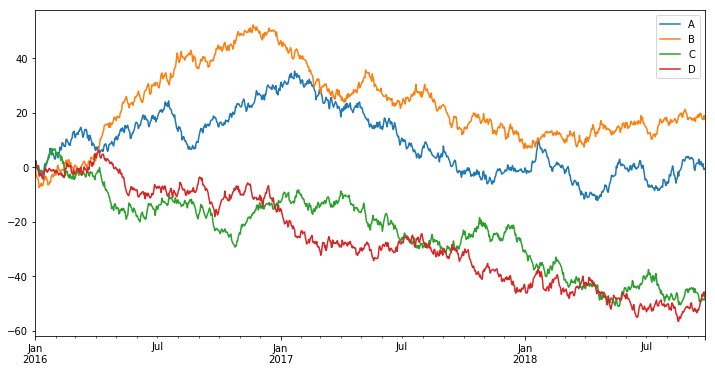

In [11]:
plt.figure()
df.plot()               # plt 레이어 위에 컬럼별로 그래프 표현
plt.legend(loc='best')  # 범례 위치를 자동으로 설정

### csv, excel 파일로 저장

In [12]:
df.to_csv('test1.csv')

In [13]:
df.to_excel('test2.xlsx', sheet_name='cumsum')

### csv 파일에서 데이터 불러오기

In [14]:
df = pd.read_csv('data/population.csv', index_col=0) # 첫번째 컬럼을 인덱스로 사용

In [15]:
df.head()

,pop,year
0,2.53,1950
1,2.57,1951
2,2.62,1952
3,2.67,1953
4,2.71,1954


In [16]:
df.tail()

,pop,year
146,10.81,2096
147,10.82,2097
148,10.83,2098
149,10.84,2099
150,10.85,2100


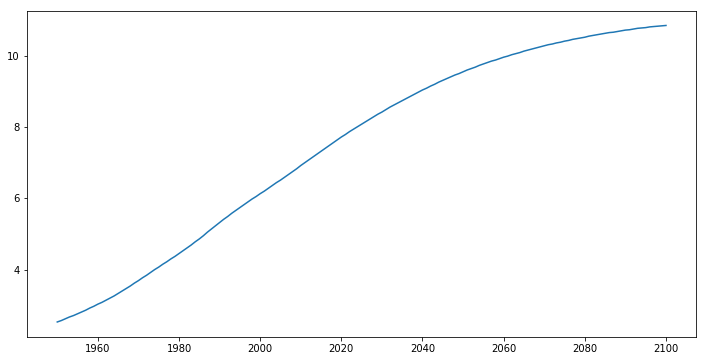

In [17]:
plt.plot(df['year'], df['pop'])

### 히스토그램

In [18]:
df = pd.read_csv('data/worldreport.csv', index_col=0)

In [19]:
df.head()

,gdp_cap,life_exp,popul
0,974.58,43.82,31.88
1,5937.02,76.42,3.60
2,6223.36,72.30,33.33
3,4797.23,42.73,12.42
4,12779.37,75.31,40.30


(array([ 8.,  7., 10., 10., 10.,  8.,  5., 32., 24., 28.]),
 array([39.61 , 43.909, 48.208, 52.507, 56.806, 61.105, 65.404, 69.703,
        74.002, 78.301, 82.6  ]),
 <a list of 10 Patch objects>)

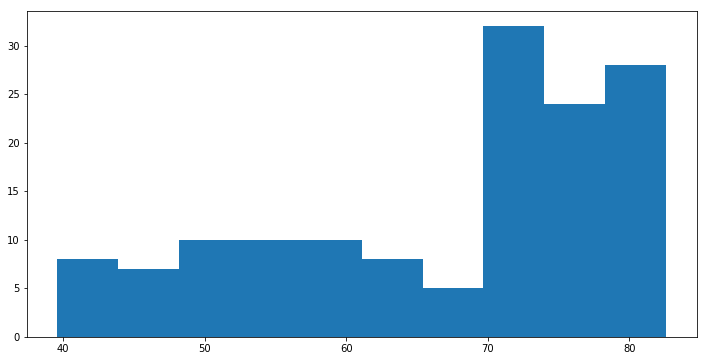

In [20]:
plt.hist(df['life_exp'])   # 자동으로 데이터를 나눔 (binning)

(array([15., 20., 18., 37., 52.]),
 array([39.61 , 48.208, 56.806, 65.404, 74.002, 82.6  ]),
 <a list of 5 Patch objects>)

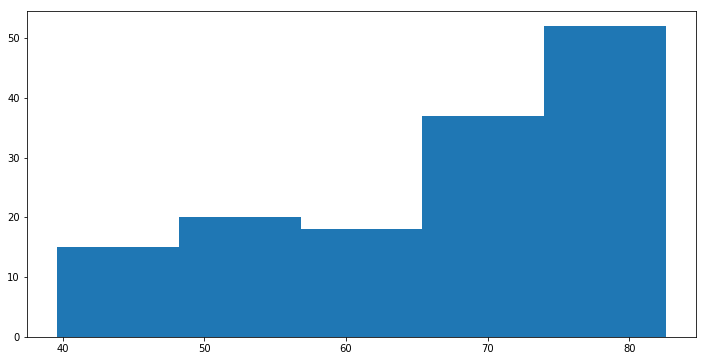

In [21]:
plt.hist(df['life_exp'], bins = 5)   # 연속형 변수의 범주를 5개로 나눈다.

(array([ 1.,  7.,  2.,  5.,  4.,  6.,  5.,  5.,  4.,  6.,  3.,  5.,  5.,
         0., 12., 20., 14., 10., 17., 11.]),
 array([39.61  , 41.7595, 43.909 , 46.0585, 48.208 , 50.3575, 52.507 ,
        54.6565, 56.806 , 58.9555, 61.105 , 63.2545, 65.404 , 67.5535,
        69.703 , 71.8525, 74.002 , 76.1515, 78.301 , 80.4505, 82.6   ]),
 <a list of 20 Patch objects>)

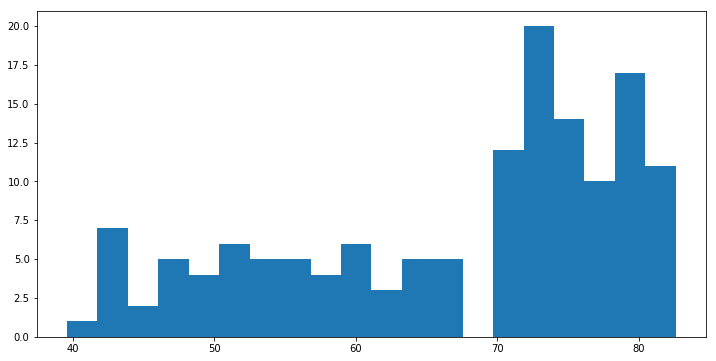

In [22]:
plt.hist(df['life_exp'], bins = 20)   # 연속형 변수의 범주를 20개로 나눈다

### 산점도 (Scatter plot)

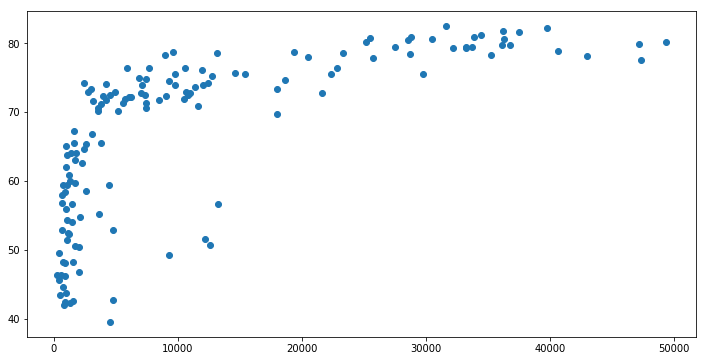

In [23]:
plt.scatter(df['gdp_cap'], df['life_exp'])

In [24]:
# 인구에 따른 점 크기 표현

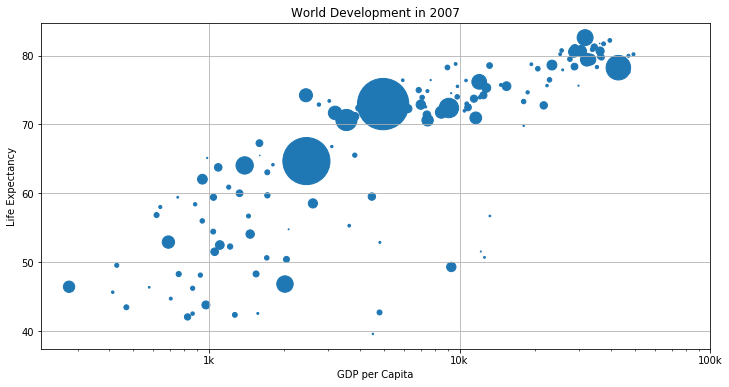

In [25]:
plt.scatter(df['gdp_cap'], df['life_exp'], s = np.array(df['popul']) * 2)
plt.xscale('log')               # 단위가 크기 때문에 log 변환
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('World Development in 2007')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)  # Adapt the ticks on the x-axis
plt.grid(True)